In [1]:
import cv2 
import numpy as np 
from PIL import Image

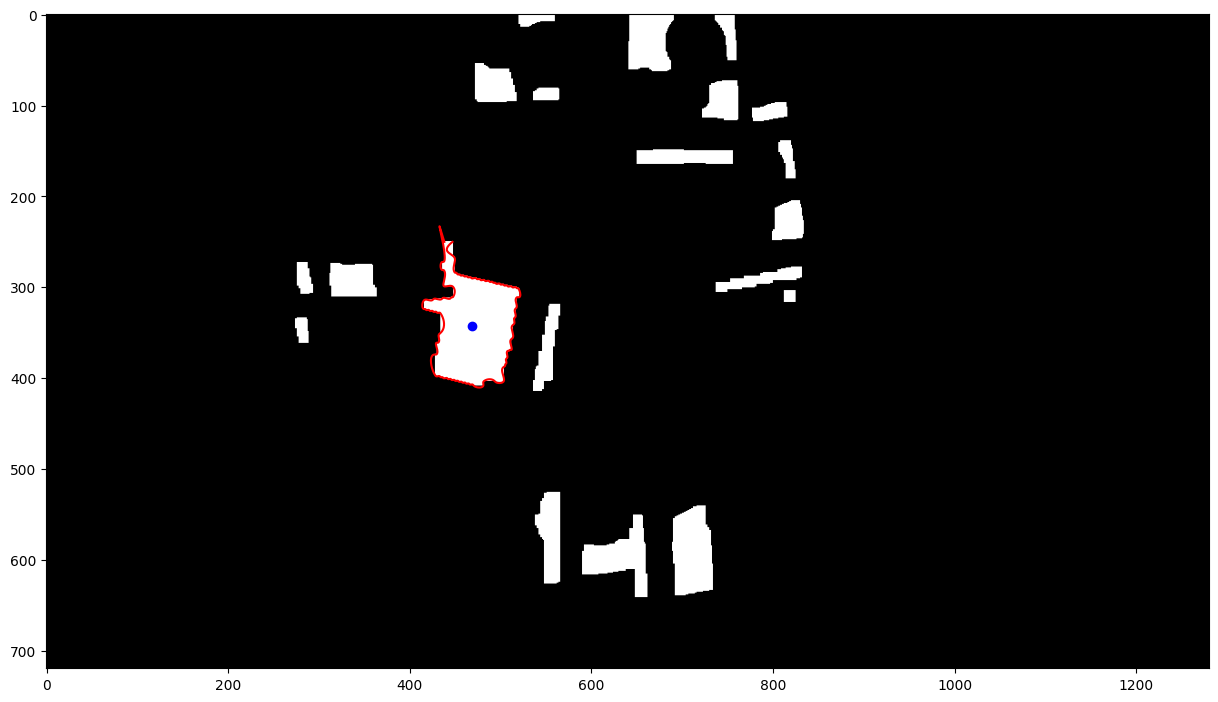

Center of biggest Area:  469 343


In [2]:
# read image
image = cv2.imread('sebbi.png') 

# detect red objects with open cv
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_red = np.array([155, 85, 0], dtype = "uint8") 

upper_red= np.array([179, 255, 255], dtype = "uint8")
mask0 = cv2.inRange(hsv, lower_red, upper_red)

kernel = np.ones((10,10),np.uint8)
opening = cv2.morphologyEx(mask0, cv2.MORPH_OPEN, kernel)
kernel = np.ones((10,10),np.uint8)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

#spline around white pixels
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt

# find contours
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

# find the biggest contour
c = max(contours, key = cv2.contourArea) 


# find the center of the contour
M = cv2.moments(c)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

# find the spline
tck, u = splprep(c[:,0,:].T, s=0.0)    
u_new = np.linspace(u.min(), u.max(), 1000) 
x_new, y_new = splev(u_new, tck, der=0)

# plot the spline
plt.figure(figsize=(15, 15))
plt.imshow(closing, cmap='gray')
plt.plot(x_new, y_new, 'r')
plt.plot(cx, cy, 'bo') 
plt.show()

# print the center of the contour

print("Center of biggest Area: ", cx, cy)

